In [ ]:
##%%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [ ]:
# 应用实例一、 某国幼儿园小朋友年龄和身高的关系问题


在数据文件ex2x.dat中存储的是小朋友年龄，而ex2y.dat中存储相应小朋友的身高信息，请利用一元线性回归模型，学习小朋友的身高与年龄的关系

In [ ]:
##%% 导入数据，绘图
data=pd.read_csv('ex1heightLinear.csv',header=None,names=['age','height'])
x = np.reshape(data["age"].values,len(data ))   
y = np.reshape(data['height'].values,len(data) )
plt.plot(x,y,'o',label='Oringinal data')
plt.xlabel('age')
plt.ylabel('height')
plt.show()

In [ ]:
##%% 代价函数、损失函数
m=len(x)
J_vals = np.zeros([100, 100])#initialize Jvals to 100x100 matrix of 0's
w_vals = np.linspace(-3, 3, 100)
b_vals = np.linspace(-1, 1, 100)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        J_vals[i,j] =0 ## <-- EDIT THIS LINE 
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y=np.meshgrid(w_vals,b_vals)
J_val=J_vals.T#由于meshgrid实现的缘故，需对函数矩阵转置
surf=ax.plot_surface(X,Y,J_val,cmap="coolwarm")
plt.colorbar(surf)
plt.xlabel('w')
plt.ylabel('b')
plt.show()

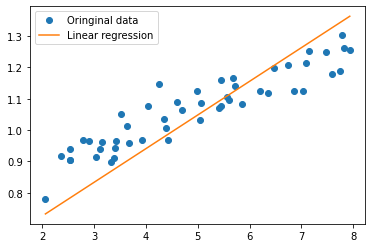

In [9]:
##%% 梯度下降
w=0
b=0
alpha=0.007
numMax=1500

for j in range(numMax):
    grad_w=0
    grad_b=0
    for k in range(m):
        grad_w+=0        ## <-- EDIT THIS LINE 
        grad_b+=0        ## <-- EDIT THIS LINE 

    w-=0               ## <-- EDIT THIS LINE
    b-=alpha*grad_b
    #print(w,b)
# %
y1=w*x+b
plt.plot(x,y,'o',label='Oringinal data')
plt.plot(x,y1,label='Linear regression')
plt.legend()


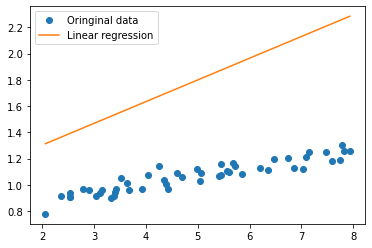

In [17]:
##%% 随机梯度下降
w=0
b=0
alpha=0.07
numMax=30
seq=np.arange(len(x))
for j in range(numMax):
    random.shuffle(seq)
    for k in range(m):
        grad_w=0   ## <-- EDIT THIS LINE
        grad_b=0  ## <-- EDIT THIS LINE
        w-=alpha*grad_w
        b-=alpha*grad_b
    
# %
y1=w*x+b
plt.plot(x,y,'o',label='Oringinal data')
plt.plot(x,y1,label='Linear regression')
plt.legend()

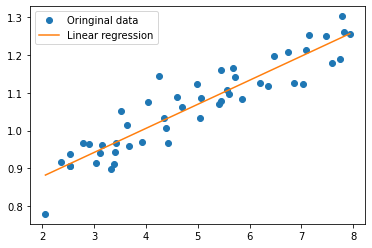

In [16]:
##%% 随机小批量梯度下降
#xx,yy为小批量数据，即每轮将x,y中的随机分批，每批为xx,yy
w=0
b=0
alpha=0.01
epochs=1500
seq=np.arange(len(x))
batchSize=10
batchNum=int(m/batchSize)
for epoch in range(epochs):
    random.shuffle(seq)
    for k in range(batchNum):
        xx=x   ## <-- EDIT THIS LINE
        yy=y   ## <-- EDIT THIS LINE
        grad_w=sum((w*xx+b-yy)*xx)/batchSize
        grad_b=sum((w*xx+b-yy))/batchSize
        w-=alpha*grad_w
        b-=alpha*grad_b
y1=w*x+b
plt.plot(x,y,'o',label='Oringinal data')
plt.plot(x,y1,label='Linear regression')
plt.legend()

/var/folders/45/71d2n3xs7zq0mc4_4k56d0b00000gn/T/ipykernel_17827/1506333693.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0.5, 'b')

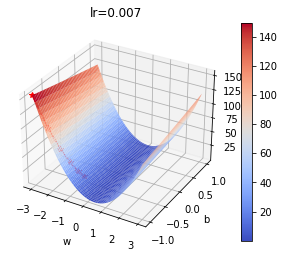

In [15]:
##%% 学习率大小与代价函数的梯度下降路径关系
#修改学习率，观察梯度下降过程
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,J_val,cmap="coolwarm")
plt.colorbar(surf)
#
w=-3
b=-1
alpha=0.007  # <-- EDIT THE VALUE OF ALPHA
pre_w=w
pre_b=b
pre_J=sum((w*x+b-y)**2/m/2)
numMax=5
for j in range(numMax):
        w-=alpha*sum((w*x+b-y)*x/m)#梯度迭代
        b-=alpha*sum((w*x+b-y)/m)#梯度迭代
        J=sum((w*x+b-y)**2/m/2)#损失函数
        ax.plot([pre_w,w],[pre_b,b],[pre_J,J],'r*-')#两次相邻迭代点连线
        pre_J=J
        pre_b=b
        pre_w=w
plt.xlabel('w')
plt.title('lr='+str(alpha))
plt.ylabel('b')
plt.show()

# 应用实例二 房价模型

文件ex1house1是某市的房屋交易数据，其中第一列为房屋面积（平米），第二列为成交价格（单位：万元）。请用一元线性回归解决此房产估值模型。

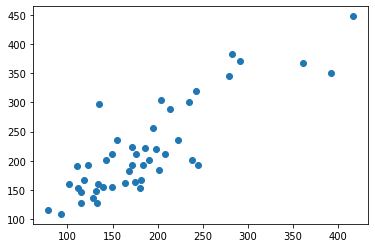

,面积(平米）,售价(万元)
0,195.0,255.936
1,149.0,211.136
2,223.0,236.160
3,132.0,148.480
4,279.0,345.536


In [3]:
##%% 读入房价数据，观察数据基本特征
# names添加列名，header用指定的行来作为标题，若原无标题且指定标题则设为None
df = pd.read_csv('ex1house1.csv', header=None, names=['面积(平米）','售价(万元)'])  
x = df.values[:,0]
y = df.values[:,1]
plt.plot(x,y,'o',label='Oringinal data')
plt.show()
df.head()

/var/folders/45/71d2n3xs7zq0mc4_4k56d0b00000gn/T/ipykernel_43785/1139782394.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


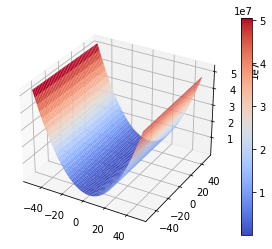

In [4]:
##%% 代价函数、损失函数
m=len(x)
J_vals = np.zeros([100, 100])#initialize Jvals to 100x100 matrix of 0's
w_vals = np.linspace(-50, 50, 100)
b_vals = np.linspace(-50, 50, 100)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        J_vals[i,j] =0 #%YOUR CODE HERE 
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y=np.meshgrid(w_vals,b_vals)
J_val=J_vals.T
surf=ax.plot_surface(X,Y,J_val,cmap="coolwarm")
plt.colorbar(surf)

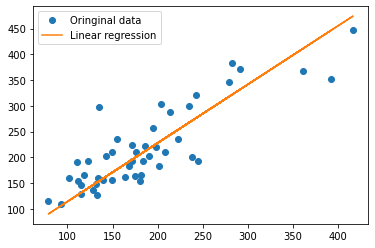

In [5]:
# %%         梯度下降求解
m=len(y)
alpha=0.000007
w=0
b=0
epoch=150
for j in range(epoch):
   #%your code here----------



   #% your code here----------
y1=w*x+b
plt.plot(x,y,'o',label='Oringinal data')
plt.plot(x,y1,label='Linear regression')
plt.legend()

# 二元房价回归模型

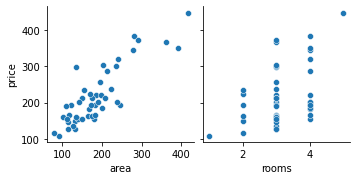

,area,rooms,price
0,195.0,3,255.936
1,149.0,3,211.136
2,223.0,3,236.160
3,132.0,2,148.480
4,279.0,4,345.536


In [6]:
##%% 文件ex2house2增加了房间数量，即第二列为房间数量。
import seaborn as sns
df = pd.read_csv('ex1house2.csv', header=None, names=['area','rooms','price'])  
X = df.values[:,:2]
y = df.values[:,2]
sns.pairplot(df,y_vars='price',x_vars=['area','rooms'], diag_kind='kde')
plt.show()
df.head()

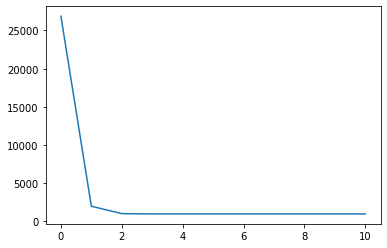

In [7]:
m=len(y)
w1=0
w2=0
b=0
numMax=10
alpha=0.00003
J=[]
J.append(sum((w1*X[:,0]+w2*X[:,1]+b-y)**2)/m/2)
for k in range(numMax):
    # 梯度
    db=0  ## <-- EDIT THIS LINE
    dw1=0 ## <-- EDIT THIS LINE
    dw2=0 ## <-- EDIT THIS LINE
    b-=alpha*db
    w1-=alpha*dw1
    w2-=alpha*dw2
    J.append(sum((w1*X[:,0]+w2*X[:,1]+b-y)**2)/m/2)
plt.plot(J)

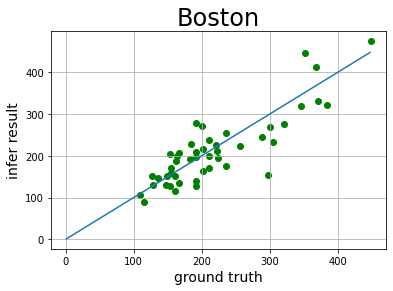

In [8]:
##%%
def draw_infer_result(groud_truths,infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1,max(groud_truths) )
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results,color='green',label='training cost') 
    plt.grid()
    plt.show()
    
# 预测
w=np.array([w1,w2])
predict = X@w+b#model.predict(x_test)
# 绘制对比图
draw_infer_result(y,predict)

[26866.298104404974, 3580.207156477006, 2472.0950599054304, 2342.391980005188, 2248.7631269093, 2159.6810861149606, 2076.049993147234, 1998.0754543643961, 1925.4876685751426, 1857.9252577775349, 1795.029620408035]


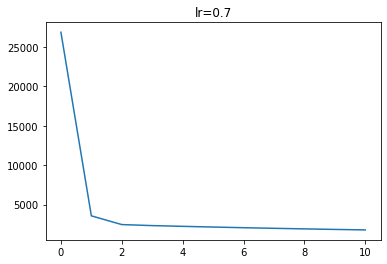

In [9]:
##%% 数据归一化
X=X   ## <-- EDIT THIS LINE
X=np.concatenate([np.ones([len(y),1]),X],axis=1)
m=len(y)
numMax=10
w=np.zeros(3)
dw=np.zeros(3)
alpha=0.7
J=[]
J.append(sum((X@w-y)**2)/m/2)
for k in range(numMax):
    for j in range(len(w)): # 逐个权重求梯度  
        dw[j]=sum((X@w-y)*X[:,j])/m
        w[j]-=alpha*dw[j]
    J.append(sum((X@w-y)**2)/m/2)
plt.plot(J)
plt.title('lr='+str(alpha))
print(J)

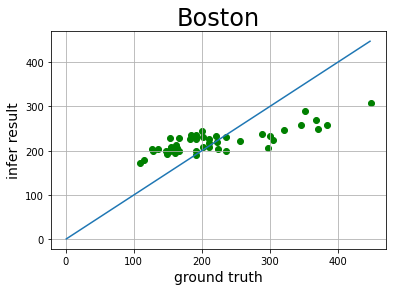

In [10]:
##%%
predict = X@w#model.predict(x_test)
# 绘制对比图
draw_infer_result(y,predict)

# 应用实例3 波士顿房价模型

波士顿房价统计数据如下所示

    特征名  解释                          类型

    CRIM 城镇人均犯罪率                    连续

    ZN  面积超过2.5万平的住宅用地比例        连续

    INDUS 非零售商业地区比例               连续

    CHAS 是否邻近Charies River( 邻:1)     离散

    NOX 一氧化氮浓度                      连续

    RM 每栋房屋的平均客房数                连续

    AGE 1940年之前建成的自用单位比例        连续

    DIS 到波士顿5个就业中心的加权距高       连续

    RAD 到径向公路的可达性指数             连续

    TAX 全值财产稅率                     连续

    PTRATIO 学生与教师的比例              连续

    B  $1000(BK-0.63)^2$, BK为黑人占比   连续

    LSTAT  低收入人群占比                连续

    MEDV  同类房屋价格的中位数            连续

假设房价和各影响因素之间能够用线性关系来描述：

 $y = {\sum_{j=1}^M w_j x_j } + b={\sum_{j=0}^M w_j x_j }$


/Users/macbook/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

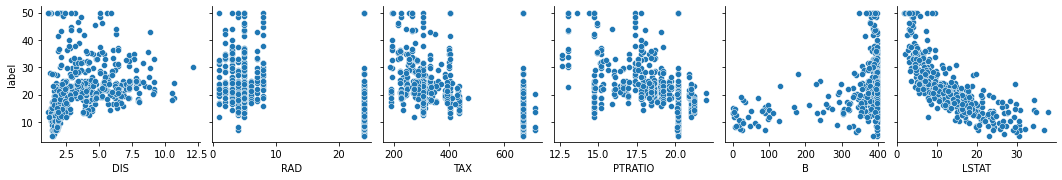

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
##%%
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  # 导入数据集
import pandas as pd
import seaborn as sns
boston = datasets.load_boston()
X = boston.data   # 特征值
y = boston.target  # 目标变量

df = pd.DataFrame(
    X,
    columns = boston.feature_names
)
df['label']=y

sns.pairplot(df,y_vars='label', x_vars=boston.feature_names[7:], diag_kind='kde')
plt.show()
df.head()


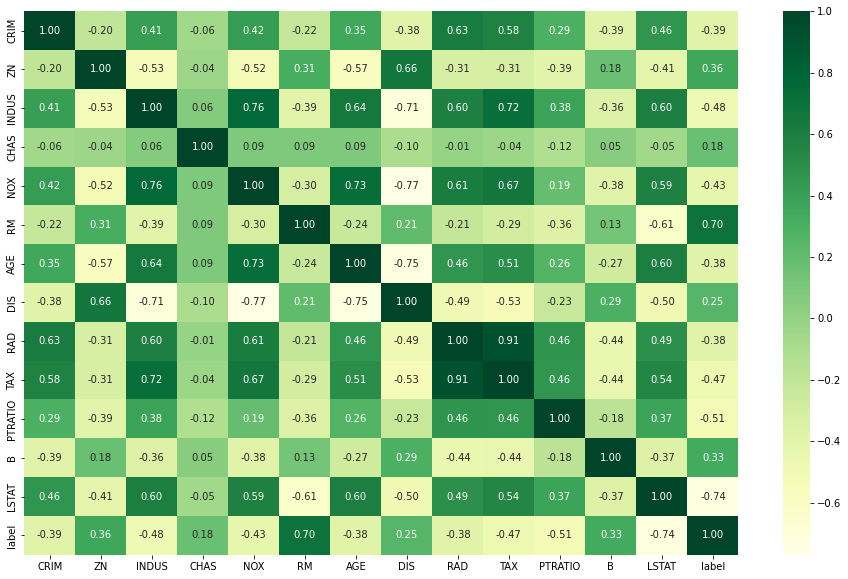

In [22]:
corr=df.corr()#相关系数
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="YlGn")
plt.show()


In [36]:
#归一化
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
#可选相关度高的前几项作为特征
X=X  #  <-----edit this line

#为增加偏置b进w而增加𝑥_0≡1后，shape变为(506,14)
X=np.concatenate([np.ones([len(y),1]),X],axis=1)
print(X.shape)#(506, 14)

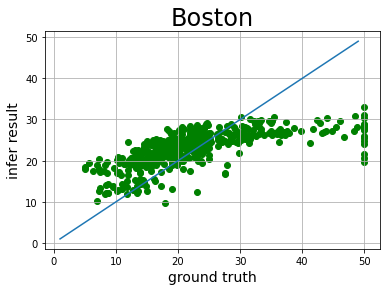

In [37]:
##%%
m=len(y)
w=np.zeros([X.shape[1]]) #(14,0)
dw=np.zeros([X.shape[1]])
alpha=0.3
numMax=15

for k in range(numMax):
    #your code here
    
    
    
    #your code here
    J=sum((X@w-y)**2)/m/2
    #print(J)
predict = X@w+b#model.predict(x_test)
# 绘制对比图
draw_infer_result(y,predict)